# Алгоритм поиска ассоциативных правил

Задание: Исследовать данные на наличие ассоциативных правил алгоритмом Ariori. Подобрать значения Supp и Сonf. Интерпретировать полученные результаты.

Алгоритм Apriori является одним из самых широко используемых алгоритмов поиска ассоциативных правил. **Негласно считается, что это первый алгоритм, который надо попробовать при решении задачи добычи данных(data mining).** Кроме алгоритма Apriori на сегодняшний день известны и другие алгоритмы поиска ассоциативных правил: Eclat, алгоритм FP-роста, AprioriDP, OPUS и др. Иногда к группе данных алгоритмов причисляют алгоритмы семейства SlopeOne.

Алгоритмы поиска ассоциативных правил нашли широкое распространение при построении экспертных систем, однако кроме этого часто используются и в практической деятельности в сфере торговли (при раскладке товаров: считается, что товары, которые часто покупаются вместе, надо размещать ближе друг к другу).

### Анализ рыночной корзины с использованием алгоритма Априори в машинном обучении

В основе Apriori — поиск частотных множеств элементов в наборе данных. Этот алгоритм построен на ассоциациях и корреляциях между наборами элементов. Он применяется на рекомендательных платформах — там, где мы обычно видим фразу *«Вам также может понравиться»*.

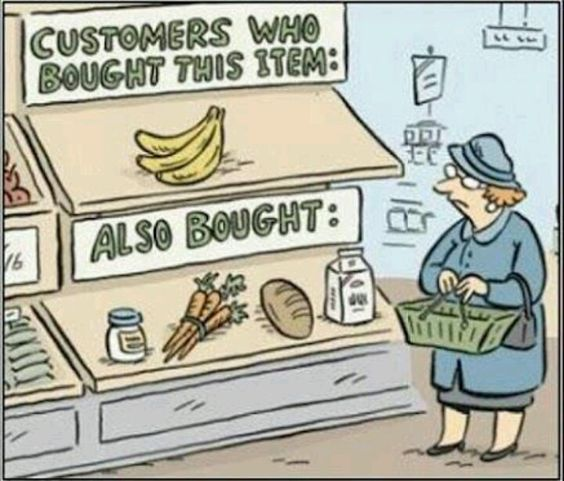

*[Источник](https://pin.it/6nEUETn)*

#### Ассоциативные правила

Алгоритм Apriori генерирует ассоциативные правила для набора данных. Ассоциативное правило подразумевает, что если в наборе содержится элемент X, то элемент Y будет содержаться в этом наборе с определённой вероятностью.

В алгоритме Apriori предполагается, что любое подмножество частотного набора элементов должно быть частотным. Например, если транзакция {молоко, яйца, хлеб} частотна, должна быть частотной и ее составляющая {яйца, хлеб}.

#### Пример

|Транзакция |	Элементы |
|-----------|------------|
|t1	        |   {Яблоки, молоко, хлеб}|
|t2	        |	{Яблоки, бананы}|
|t3	        |	{Бананы, конфеты}|
|t4	        |	{Яблоки, хлеб, бананы}|
|t5	        |	{Яблоки, молоко, хлеб,  бананы, конфеты}|
|t6	        |	{Молоко, хлеб, конфеты}|
|t7	        |	{Хлеб, бананы, конфеты}|

В данной таблице мы видим 7 транзакций из продуктового магазина. В строке каждой транзакции представлены купленные продукты. Всё множетсво продуктов может быть представлено в виде:
$$ I = \{i_1, i_2, ..., i_k\}$$
В нашем случае:$ I = \{Яблоки, молоко, хлеб,  бананы, конфеты\}$

Одна транзакция может быть представлена в виде:
$$ T = \{t_1, t_2, ..., t_n\}$$

Например, 
$T = \{Яблоки, молоко, хлеб\}$

Ассоциативное правило определяется следующим образом:
$$X⇒Y, где X⊂I, Y⊂I и X∩Y=0$$

Например, $\{Яблоки, молоко\}⇒\{Хлеб\}$



### Принцип работы Apriori

Чтобы из всего многообразия правил отобрать интересные, для примера супермаркета применим следующие показатели:

- **поддержка**;
Поддержка элемента x — это не что иное, как отношение числа транзакций с товаром x к общему числу транзакций.

$$ Support(X⇒Y) = \frac{Frequency(X, Y)}{N}$$

Например, $Support(Яблоки⇒Бананы) = \frac{3}{7} = 43%$

- **доверие**;
Доверием (X⇒Y) обозначают вероятность покупки товара y при покупке товара x. В этом методе учитывается популярность товара x.

$$ Confidence(X⇒Y) = \frac{Frequency(X, Y)}{Frequency(X)}$$

Например, $Confidence(Яблоки⇒Бананы) = \frac{4/7}{5/7} = 80% $

- **лифт**;
Лифт (X⇒Y) — это отношение между наблюдаемой поддержкой и ожидаемой моддержкой X и Y, если бы они были независимыми.

$$Lift(X⇒Y) = \frac{Support(X⇒Y)}{Support(X) * Support(Y)}$$ 

Если лифт (X⇒Y) = 1, то корреляции в наборе товаров нет.

Если лифт (X⇒Y) > 1, корреляция в наборе товаров положительная, то есть вероятность совместной покупки товаров x и y выше.

Если лифт (X⇒Y) < 1, корреляция в наборе товаров отрицательная, то есть совместная покупка товаров x и y маловероятна.

Например, $lift(Яблоки⇒Бананы) = \frac{3/7}{4/7 * 4/7} = 1,3125$

- **уверенность**(conviction). Уверенность правила определяется так:

$$Conviction(X⇒Y) = \frac{1 - support(Y)}{1 - confidence(X⇒Y)}$$

Его можно интерпретировать как отношение ожидаемой частоты возникновения X без Y, если X и Y независимы, к наблюдаемой частоте неправильных предсказаний.

Если уверенность (X ⇒ Y) = 1, то между x и y связи нет.
В правиле чем выше уверенность, тем выше интерес.

Например, $conviction(Яблоки⇒Бананы) = \frac{1 - 4/7}{1-4/5} = 1,43$

*Основная цель анализа рыночной корзины в маркетинге* – предоставить розничному продавцу информацию, необходимую для понимания покупательского поведения, и это может помочь розничному продавцу принять неправильные решения.

#### Проанализируем данные потребительской корзины:

Dataset: DataSet_france.csv

InvoiceNo: 6-тизначный номер, назначенный для каждой транзакции.

StockCode: 5-тизначный номер продукта в системе.

Description: Название продукта.

Quantity: Количества продукта в транзакции.

InvoiceDate: Дата и время покупки.

UnitPrice: Цена продукта.

CustomerID: 5-тизначный номер покупателя.

Country: Название страны, откуда произошла покупка.

In [ ]:
# для решения нашей задачи будем использовать библиотеку mlxtend(machine learning extensions)
%pip install mlxtend

In [2]:
# Подгрузим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
#посмотрим на данные
data = pd.read_csv(r"C:\Users\Анна\Desktop\ML занятия\HSE ML\HSE ML\DataSets\my datasets\DataSet_france.csv", sep=',')
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    8557 non-null   object 
 1   StockCode    8557 non-null   object 
 2   Description  8557 non-null   object 
 3   Quantity     8557 non-null   int64  
 4   InvoiceDate  8557 non-null   object 
 5   UnitPrice    8557 non-null   float64
 6   CustomerID   8491 non-null   float64
 7   Country      8557 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 534.9+ KB


Проверим качество данных:

In [5]:
data.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID     66
Country         0
dtype: int64

Заполним отсутствующий CustomerID с помощью "фейкового" ID 99999

In [6]:
data = data.fillna(99999)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Также проверим качество наших данных с помощью описательной статистики.
Для удобства просмотра транспонируем матрицу.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,8557.0,12.911067,21.425031,-250.0,5.00,10.00,12.00,912.00
UnitPrice,8557.0,5.028864,79.909126,0.0,1.25,1.79,3.75,4161.06
CustomerID,8557.0,13351.501461,7644.630787,12413.0,12571.00,12678.00,12690.00,99999.00


Заметим, что по полю "Quantity" есть подозрительное значение -250, а по полю "UnitPrice" есть цена равная 0. Нам нужно избавиться от таких записей в таблице. 

In [8]:
data = data[data["Quantity"] > 0]
data = data[data["UnitPrice"] > 0]

Посмотрим на ТОП-10 самых продаваемых товаров

c:\ProgramData\anaconda3\envs\torch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\torch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\torch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


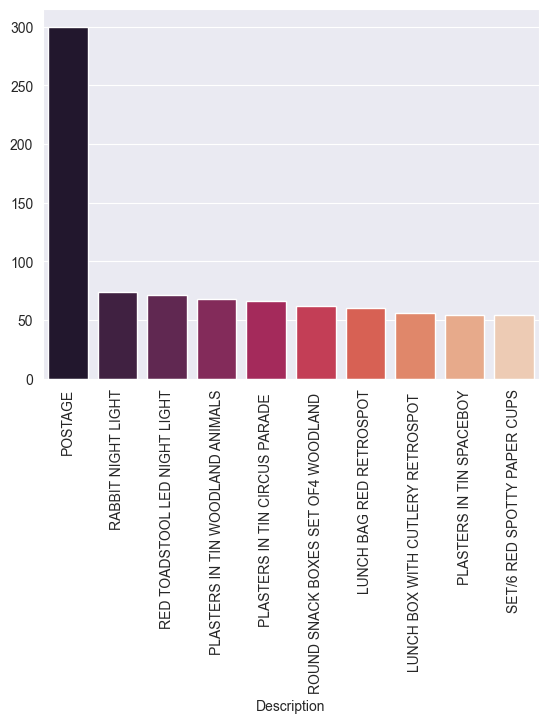

In [9]:
x = data['Description'].value_counts().sort_values(ascending=False)[:10]
sns.set_style('darkgrid')
sns.barplot(x = x.index, y= x.values, palette='rocket')
plt.xticks(rotation=90)
plt.show()

Мы можем заметить, что самой популярной "покупкой" оказались почтовые расходы(postage).
Для полноценного анализа транзакций не вполне корректно учитывать доставку, так как, разумеется, она входит в каждый заказ интернет-магазина.

Поэтому, удалим строки со значением "postage".

In [10]:
data = data.loc[data['Description'] != 'POSTAGE']

Теперь наши данные достаточно очищены для дальнейшей работы с ними.

Для обработки наших данных алгоритмом Apriori в Python, нужно создать список транзакций, как в примере в начале практики. 

Создадим матрицу, в которой заказы будут перегруппированы по номерам инвойсов(транзакций).
Если товар есть в транзакции, в таблице будет стоять 1, если нет, в таблице будет 0.

In [32]:
# помимо показанного выше, добавим ещё одно действие - конвертируем таблицу в логический тип данных
data_for_apriori = data.groupby(['InvoiceNo', 'Description'])['UnitPrice'].sum().unstack().fillna(0). \
                 map(lambda x: 1 if x > 0 else 0)

data_for_apriori.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Рассчитаем значения поддержки(support) для каждой возможной конфигурации элементов (порог поддержки выбран 0,01 (1%))

In [12]:
frequent_itemsets = apriori(data_for_apriori.astype('bool'), min_support=0.01, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.023256,( DOLLY GIRL BEAKER)
1,0.012920,( I LOVE LONDON MINI BACKPACK)
2,0.018088,( SET 2 TEA TOWELS I LOVE LONDON )
3,0.041344,( SPACEBOY BABY GIFT SET)
4,0.031008,(10 COLOUR SPACEBOY PEN)


А теперь создадим правила и посмотрим некоторые из них:

In [29]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)

rules.sort_values("support", ascending=False).tail(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
427450,(ROUND SNACK BOXES SET OF4 WOODLAND ),"(ALARM CLOCK BAKELIKE PINK, LUNCH BAG APPLE DE...",0.160207,0.010336,0.010336,0.064516,6.241935,0.008680,1.057917,1.0
427451,(ALARM CLOCK BAKELIKE RED ),"(ALARM CLOCK BAKELIKE PINK, LUNCH BAG APPLE DE...",0.095607,0.010336,0.010336,0.108108,10.459459,0.009348,1.109623,1.0
427452,(SKULL LUNCH BOX WITH CUTLERY ),"(ALARM CLOCK BAKELIKE PINK, LUNCH BAG APPLE DE...",0.051680,0.010336,0.010336,0.200000,19.350000,0.009802,1.237080,1.0
427453,(LUNCH BOX WITH CUTLERY RETROSPOT ),"(ALARM CLOCK BAKELIKE PINK, LUNCH BAG APPLE DE...",0.144703,0.010336,0.010336,0.071429,6.910714,0.008840,1.065792,1.0
1139821,(LUNCH BOX WITH CUTLERY RETROSPOT ),"(ALARM CLOCK BAKELIKE PINK, CHILDRENS CUTLERY ...",0.144703,0.010336,0.010336,0.071429,6.910714,0.008840,1.065792,1.0


In [14]:
# выведем результаты с определёнными параметрами
rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>5)].sort_values("confidence", ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
49813,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER PLATES),0.103359,0.129199,0.100775,0.975000,7.546500,0.087421,34.832041,0.967487
49812,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER CUPS),0.103359,0.139535,0.100775,0.975000,6.987500,0.086353,34.418605,0.955664
8090,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.129199,0.139535,0.124031,0.960000,6.880000,0.106003,21.511628,0.981454
2307,(CHILDRENS CUTLERY SPACEBOY ),(CHILDRENS CUTLERY DOLLY GIRL ),0.069767,0.072351,0.064599,0.925926,12.797619,0.059552,12.523256,0.991000
5894,(PACK OF 6 SKULL PAPER PLATES),(PACK OF 6 SKULL PAPER CUPS),0.056848,0.064599,0.051680,0.909091,14.072727,0.048007,10.289406,0.984932


#### Пример использования правил
Представим, что мы работаем в этом Интернет-магазине и хотим создать рекомендательную систему для покупателей. Для этого создадим функцию, которая по названию товара возвращает рекомендуемые товары(по умолчанию - 5 штук):

In [27]:
def recommend_product(rules, product_name, num_of_products=5):
    sorted_rules = rules.sort_values("support", ascending=False) 
    recommendation_list = []  
    for idx, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            
            if j == product_name:
                recommendation_list.append(list(sorted_rules.iloc[idx]["consequents"])[0])
                recommendation_list = list( dict.fromkeys(recommendation_list) )
    return(recommendation_list[0:num_of_products])

Теперь мы можем передать в функцию товар, попавший в корзину, и выдать рекомендации:

In [28]:
recommend_product(rules, ('SET/6 RED SPOTTY PAPER PLATES')) 

['SET/6 RED SPOTTY PAPER CUPS',
 'SET/20 RED RETROSPOT PAPER NAPKINS ',
 'PACK OF 6 SKULL PAPER PLATES',
 'PACK OF 6 SKULL PAPER CUPS',
 'PACK OF 20 SKULL PAPER NAPKINS']

Рекомендательные системы - яркий пример использования ассоциативных правил. Однако, это не единственная область их применения.
Помимо применения  в маркетинге (адресная рассылка (direct mail), кросс-продажи), этот алгоритм можно применять и к анализу данных, для проверки их на "чистоту" и отсутствие внутренних зависимостей.